In [1]:
using JLD2, Plots, CurveFit

In [4]:
N = 6
test_values = zeros(ComplexF64,(2*N-1)^2)

l = length(test_values)

distx = 0.0005## distance from centre in real

disty = 0.0005# distance from centre in imaginary

cent_im = 0.0602im

cent_r = 0.0775

include("Potts-Operators & Hamiltonian.jl")
## snake like structure of test_values will allow for faster convergence when recycling ψ (because you don't jump the entire distx after the loop)
for i in 1:1:(2*N-1)
    if div(i,2) == 1
        for j in 1:1:(2*N-1)
            if i <N+1
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i])  .+cent_r+ 1im*LinRange(-disty,0.00,N)[j] .+cent_im
                else 
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i])  .+cent_r + 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N] .+cent_im
                end
            else
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N]) .+cent_r  + 1im*LinRange(-disty,0.00,N)[j]  .+cent_im
                else
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N])  .+cent_r+ 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N].+cent_im
                end
            end 
        end
    else
        for j in (2*N-1):-1:1
            if i <N+1
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i]) .+cent_r+ 1im*LinRange(-disty,0.00,N)[j] .+cent_im
                else 
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i])  .+cent_r + 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N] .+cent_im
                end
            else
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N]) .+cent_r + 1im*LinRange(-disty,0.00,N)[j] .+cent_im
                else
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N])   .+cent_r + 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N] .+cent_im
                end
            end 
        end
    end
end
λ_list = test_values
L_list = 8:13
Op_label  = ["I","σ","ϵ","L-1ϵ"]
data = load("D500results.jld2")
Δth = [0,data["Δσ th "],data[ "Δε th"],data["ΔL1ε th"]]
cth = 1.13754733664723 - 0.0210687419403234im

1.13754733664723 - 0.0210687419403234im

In [70]:
Δ_list = zeros(ComplexF64,length(L_list),length(λ_list),3)
E0_list = zeros(ComplexF64,length(L_list),length(λ_list))
for (i,L) in enumerate(L_list)
    dataσ = load("sigma_Energy_$(L)_80.jld2")
    # data = load("QP_Energy_$(L)_80.jld2")
    E0 = dataσ["E0"]
    Eσ = dataσ["Eσ"]
    E0_list[i,:] = E0
    Δ_list[i,:,1] = Eσ .- E0
    # Δ_list[i,:,2] = [Eε[1]]
    # Δ_list[i,:,3] = [Eε[2]]
end

ArgumentError: ArgumentError: No file exists at given path: sigma_Energy_8_80.jld2

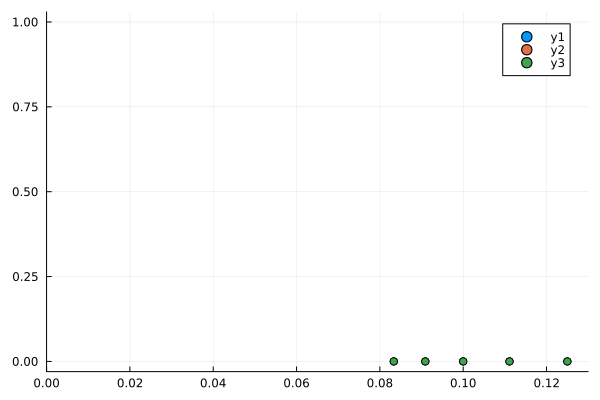

In [71]:
ind = 1
plt = plot(xlims=(0,0.13))
for i = 1:3 
    scatter!(plt,1 ./L_list,real(Δ_list[:,ind,i]))
end

display(plt)

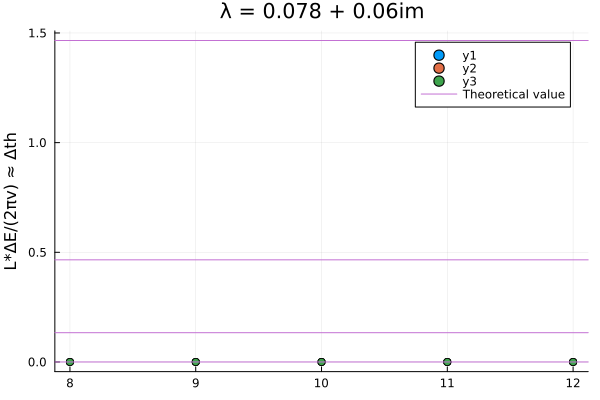

In [72]:
ind = 5
v = 2.8810 − 0.7091im
plt = plot(xlable ="L", ylabel = "L*ΔE/(2πv) ≈ Δth",title="λ = $(λ_list[ind])")
for i = 1:3 
    scatter!(plt,L_list,real(Δ_list[:,ind,i].*L_list/(2π*v)))
end
hline!(plt,real([Δth]),label="Theoretical value")
display(plt)

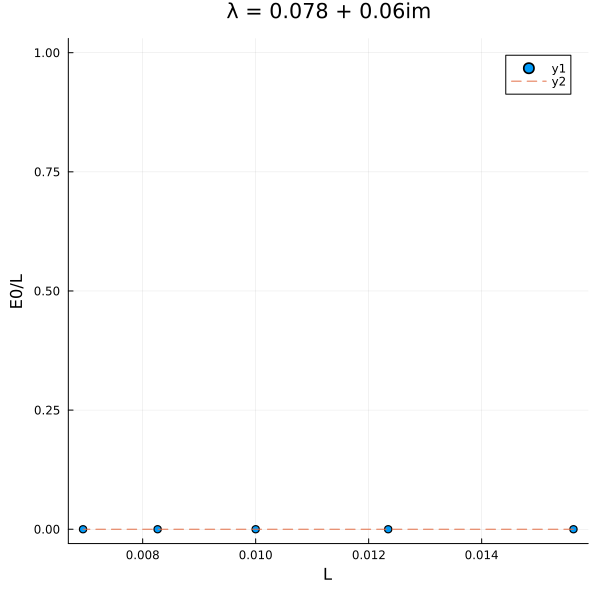

In [73]:
#v = 2.8810 − 0.7091im
ϵ0 = E0_list[:,ind]./L_list
ϵ0_re = real(E0_list[:,ind])./L_list
fit = linear_fit(1.0./L_list.^2, ϵ0)
plt = plot(xlabel="L",ylabel="E0/L",size=(600,600),title="λ = $(λ_list[ind])")
scatter!(plt,1.0./L_list.^2,ϵ0_re)
plot!(plt,1.0./L_list.^2, real(fit[1] .+ fit[2]./L_list.^2),linestyle=:dash)
display(plt)

In [74]:
v_list = []
for i=1:length(L_list)-1
    ini = i
    fit = linear_fit(1.0./L_list[ini:ini+1].^2, ϵ0[ini:ini+1])
    @info L_list[i]
    @info fit
    v = -6*fit[2]/π/cth
    @info v
    push!(v_list,v)
end

┌ Info: 8
└ @ Main c:\Users\vicva\OneDrive\Documenten\git\Thesis_CCFT\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W6sZmlsZQ==.jl:5
┌ Info: (0.0 + 0.0im, 0.0 + 0.0im)
└ @ Main c:\Users\vicva\OneDrive\Documenten\git\Thesis_CCFT\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W6sZmlsZQ==.jl:6
┌ Info: 0.0 - 0.0im
└ @ Main c:\Users\vicva\OneDrive\Documenten\git\Thesis_CCFT\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W6sZmlsZQ==.jl:8
┌ Info: 9
└ @ Main c:\Users\vicva\OneDrive\Documenten\git\Thesis_CCFT\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W6sZmlsZQ==.jl:5
┌ Info: (0.0 + 0.0im, 0.0 + 0.0im)
└ @ Main c:\Users\vicva\OneDrive\Documenten\git\Thesis_CCFT\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W6sZmlsZQ==.jl:6
┌ Info: 0.0 - 0.0im
└ @ Main c:\Users\vicva\OneDrive\Documenten\git\Thesis_CCFT\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W6sZmlsZQ==.jl:8
┌ Info: 10
└ @ Main c:\Users\vicva\OneDrive\Documenten\git\Thesis_CCFT\jl_notebook_cell_df34fa98e69747e1a8f8

v_extrapolate = 0.0 - 0.0im


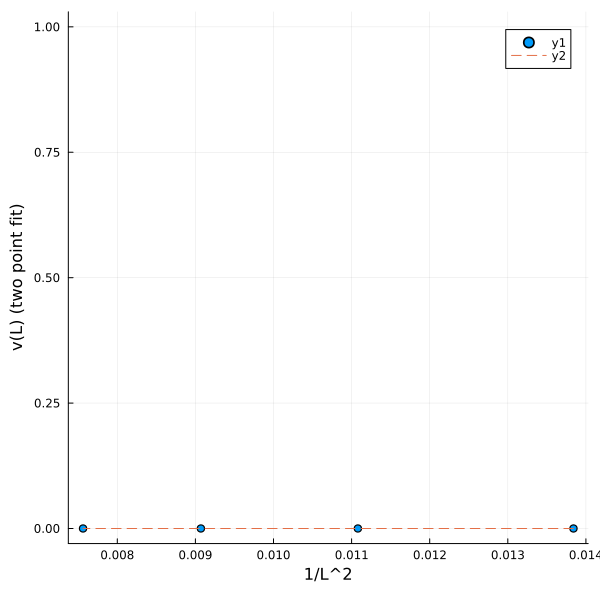

In [75]:

Leff = 0.5.+L_list[1:end-1]
fit = linear_fit(1.0./Leff[1:end].^2,v_list[1:end])
v_extrapolate = fit[1]
@show v_extrapolate
plot(xlabel="1/L^2",ylabel="v(L) (two point fit)",size=(600,600))
scatter!(1.0./Leff.^2,real(v_list))
plot!(1.0./Leff.^2,real(fit[1].+fit[2]./Leff.^2),linestyle = :dash)

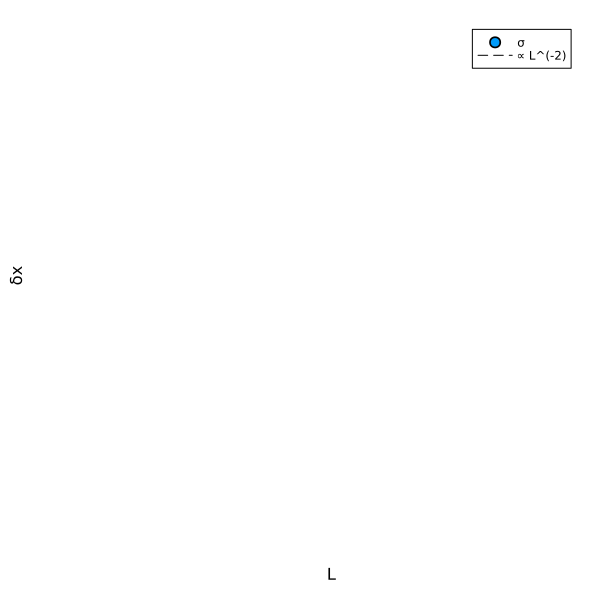

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\vicva\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\vicva\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\vicva\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\vicva\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\vicva\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\vicva\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\vicva\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194


In [76]:
v = v_extrapolate
#v = 2.8793585911048227 + 0.05332917686611719im
plt = plot(xscale=:log10,yscale=:log10,xlabel="L",ylabel="δx",size=(600,600))
δx = [abs.(real(Δ_list[:,ind,i].*L_list/(2π*v)).-real(Δth[i+1])) for i=1:3]
for i = 1:1
    scatter!(plt,L_list,δx[i],label=Op_label[i+1])
end
plot!(plt,L_list,δx[1][1]*(L_list/L_list[1]).^(-2),color=:black,label="∝ L^(-2)",linestyle=:dash)
# plot!(plt,L_list,δx[2][1]*(L_list/L_list[1]).^(-2),color=:black,label="",linestyle=:dash)
# plot!(plt,L_list,δx[3][1]*(L_list/L_list[1]).^(-2),color=:black,label="",linestyle=:dash)
display(plt)

In [ ]:
L_list = 8:14
λ_list = [0.0773 + 0.0593im, 0.078 + 0.0593im, 0.0787 + 0.0593im, 0.0773 + 0.06im, 0.078 + 0.06im, 0.0787 + 0.06im, 0.0773 + 0.0607im, 0.078 + 0.0607im, 0.0787 + 0.0607im]
Op_label  = ["I","σ","ϵ","L-1ϵ"]
data = load("D500results.jld2")
Δth = [0,data["Δσ th "],data[ "Δε th"],data["ΔL1ε th"]]
cth = 1.13754733664723 - 0.0210687419403234im





function Finite_size_scaling(lambda_list,L_list)
    plt = plot(xscale=:log10,yscale=:log10,xlabel="L",ylabel="δx",size=(600,600),legend=:bottomleft)
    Δ_list = zeros(ComplexF64,length(L_list),length(lambda_list),3)
    E0_list = zeros(ComplexF64,length(L_list),length(lambda_list))

    for (i,L) in enumerate(L_list)
        dataσ = load("sigma_analysis/sigma_Energy_$(L)_80.jld2")
        E0 = dataσ["E0"]
        Eσ = dataσ["Eσ"]
        E0_list[i,:] = E0
        Δ_list[i,:,1] = Eσ - E0
    end
    for (ind,lambda) in enumerate(lambda_list)
        ϵ0 = E0_list[:,ind]./L_list
        v_list = []
        for i=1:length(L_list)-1
            ini = i
            fit = linear_fit(1.0./L_list[ini:ini+1].^2, ϵ0[ini:ini+1])
            v = -6*fit[2]/π/cth
            push!(v_list,v)
        end
        Leff = 0.5.+L_list[1:end-1]
        e = plot(xlabel="1/L^2",ylabel="v(L) (two point fit)",size=(600,600))
        scatter!(1.0./Leff.^2,real(v_list),label="$lambda")
        fit = linear_fit(1.0./Leff[1:end].^2,v_list[1:end])

        plot!(1.0./Leff.^2,real(fit[1].+fit[2]./Leff.^2),linestyle = :dash)
        # display(e)
        Leff = 0.5.+L_list[1:end-1]
        v = fit[1]
       
    δx = [abs.(real(Δ_list[:,ind,i].*L_list/(2π*v)).-real(Δth[i+1])) for i=1:3]
    for i = 1:1
        scatter!(plt,L_list,δx[i],label="$lambda")
    end
    plot!(plt,L_list,δx[1][1]*(L_list/L_list[1]).^(-2),color=:black,label="",linestyle=:dash)
    end
    display(plt)
end







function Finite_size_scaling_alt(lambda_list,range,L_list)
    plt = plot(xscale=:log10,yscale=:log10,xlabel="L",ylabel="δx",size=(600,600),legend=:bottomleft)
    Δ_list = zeros(ComplexF64,length(L_list),1,3)
    E0_list = zeros(ComplexF64,length(L_list),1)

    for (i,L) in enumerate(L_list)
        dataσ = load("sigma_analysis/more_lambda/sigma_Energy_$(L)_80.jld2")
        E0 = dataσ["E0"][range]
        Eσ = dataσ["Eσ"][range]
        E0_list[i,1] = E0
        Δ_list[i,1,1] = Eσ .- E0
    end
    for (ind,lambda) in enumerate(lambda_list)
        ϵ0 = E0_list[:,ind]./L_list
        v_list = []
        for i=1:length(L_list)-1
            ini = i
            fit = linear_fit(1.0./L_list[ini:ini+1].^2, ϵ0[ini:ini+1])
            v = -6*fit[2]/π/cth
            push!(v_list,v)
        end
        Leff = 0.5.+L_list[1:end-1]
        e = plot(xlabel="1/L^2",ylabel="v(L) (two point fit)",size=(600,600))
        scatter!(1.0./Leff.^2,imag(v_list),label="$lambda")
        fit = linear_fit(1.0./Leff[1:end].^2,v_list[1:end])

        plot!(1.0./Leff.^2,imag(fit[1].+fit[2]./Leff.^2),linestyle = :dash)
        display(e)
        Leff = 0.5.+L_list[1:end-1]
        v = fit[1]
       
    δx = [abs.(imag(Δ_list[:,ind,i].*L_list/(2π*v)).-imag(Δth[i+1])) for i=1:3]
    for i = 1:1
        scatter!(plt,L_list,δx[i],label="$lambda")
    end
    plot!(plt,L_list,δx[1][1]*(L_list/L_list[1]).^(-2),color=:black,label="",linestyle=:dash)
    end
    display(plt)
end

Finite_size_scaling_alt (generic function with 1 method)

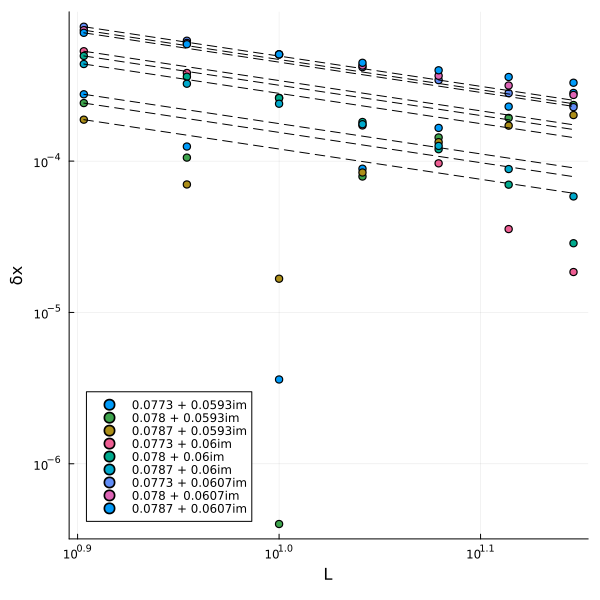

In [172]:
    ## either all together 
    Finite_size_scaling(λ_list,L_list)

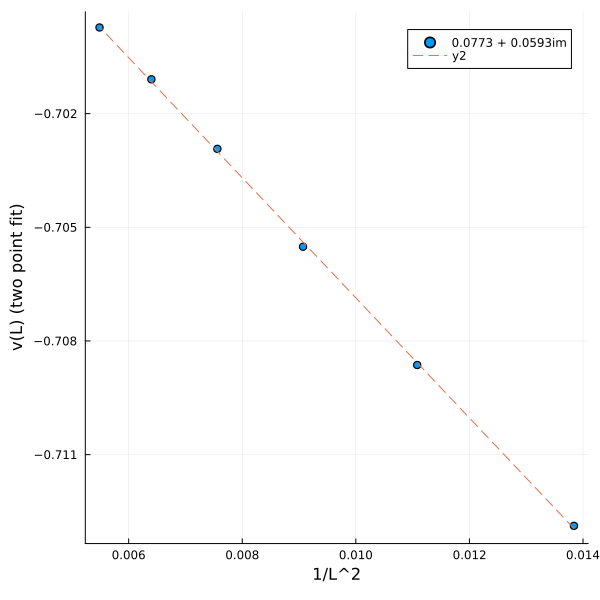

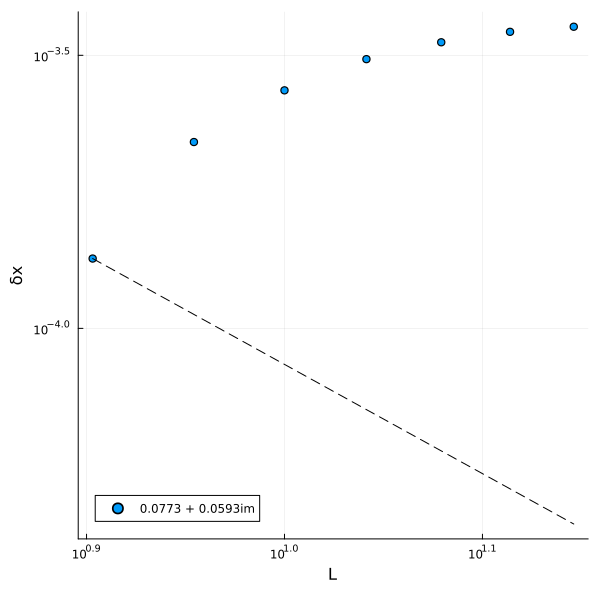

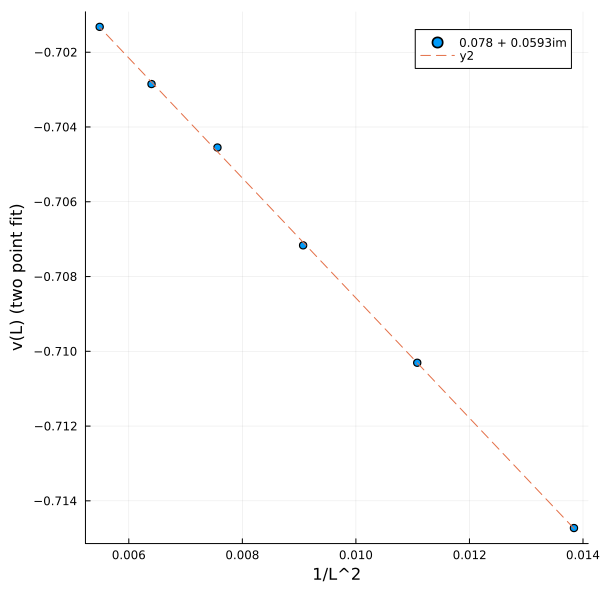

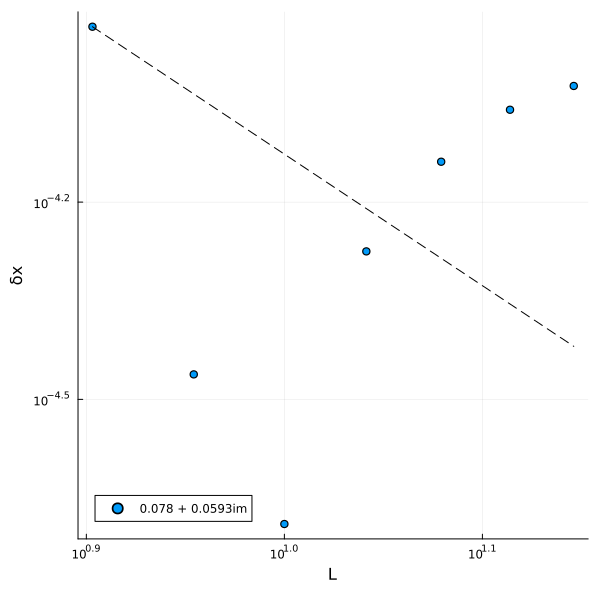

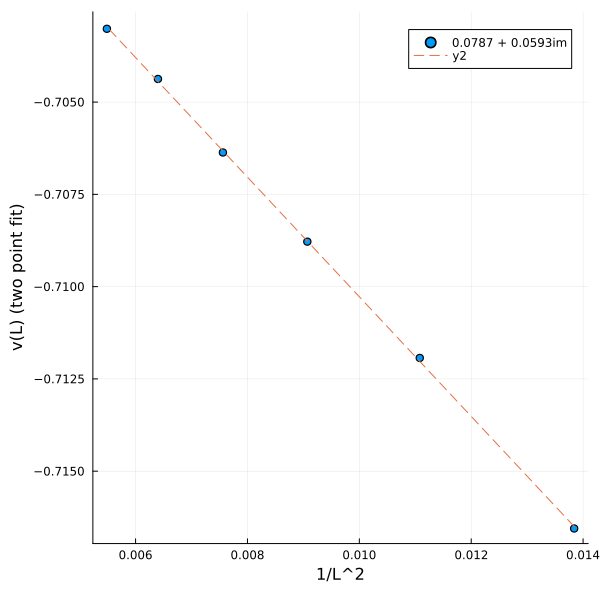

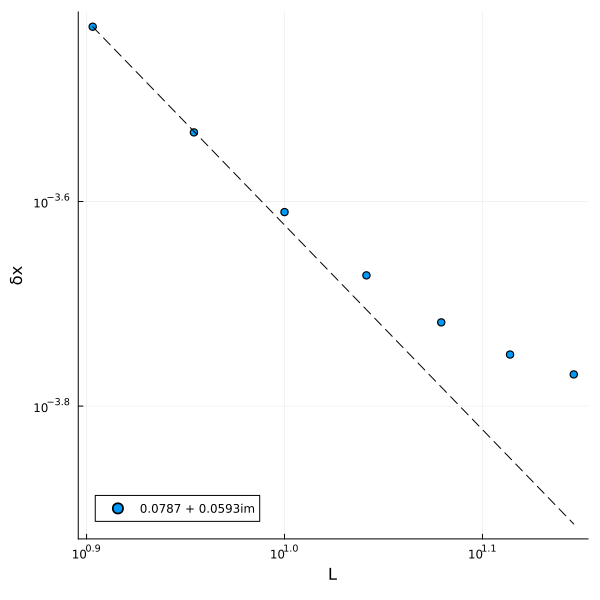

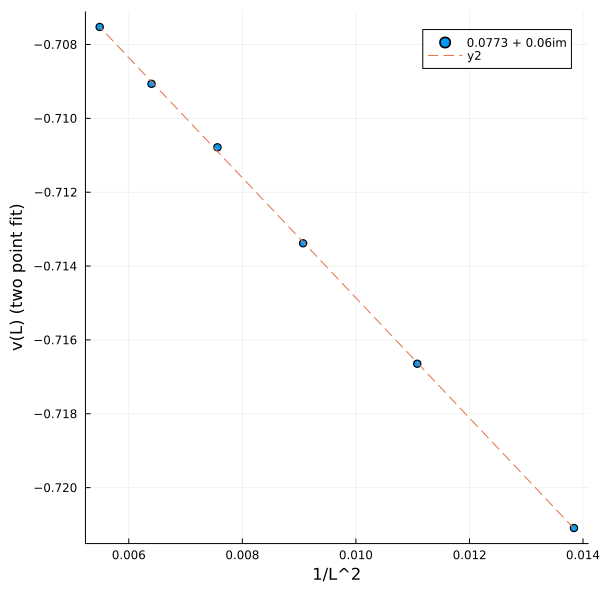

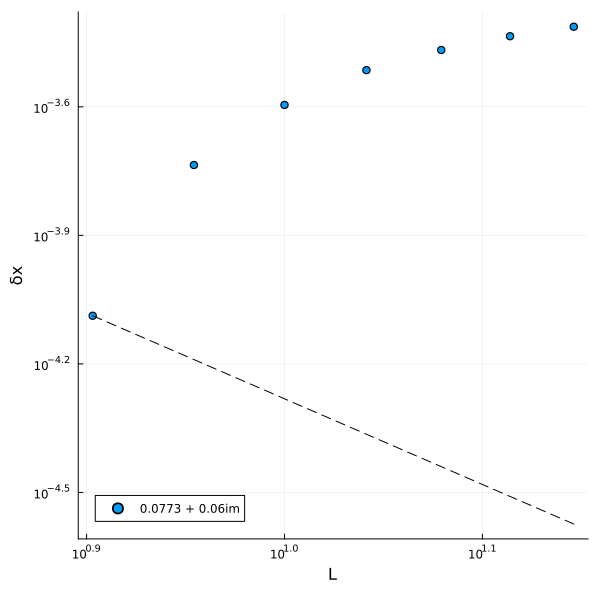

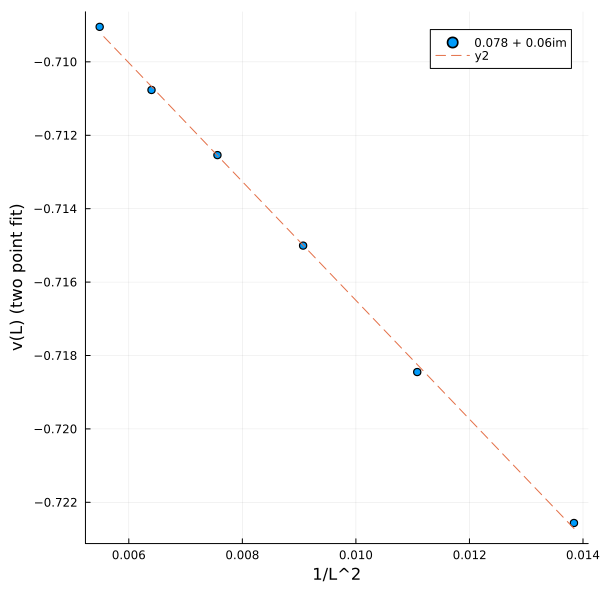

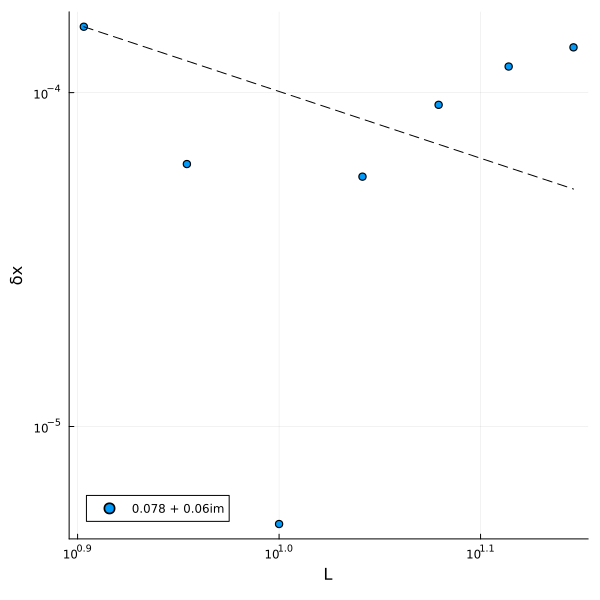

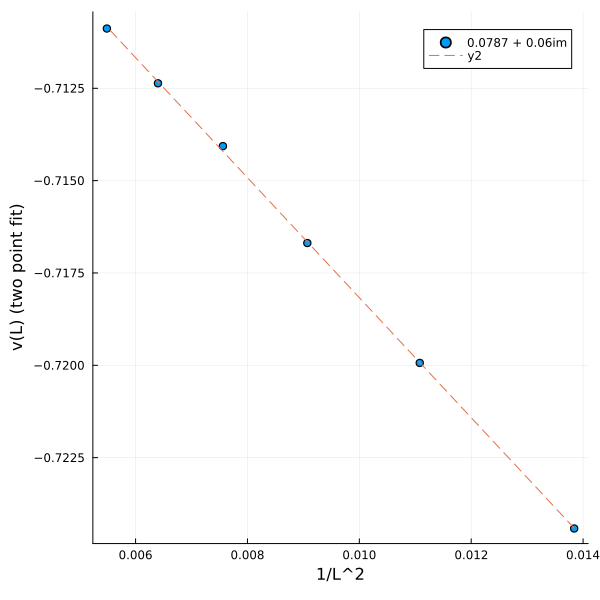

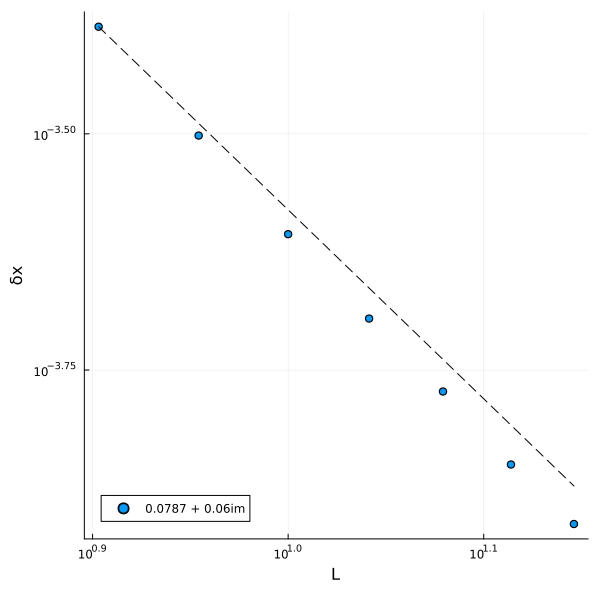

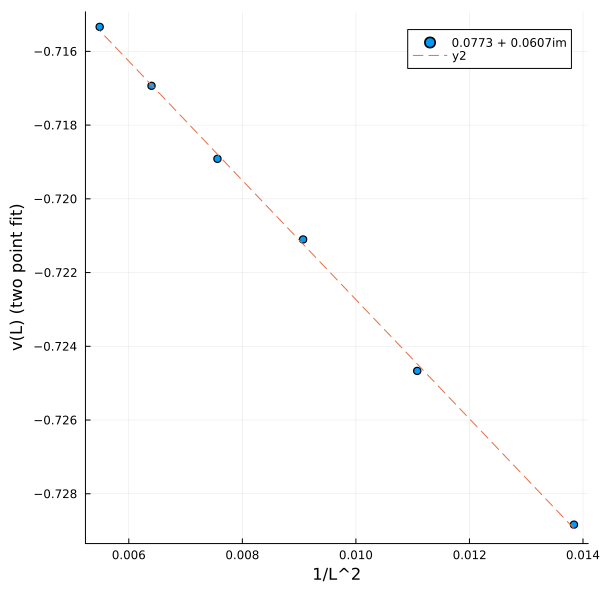

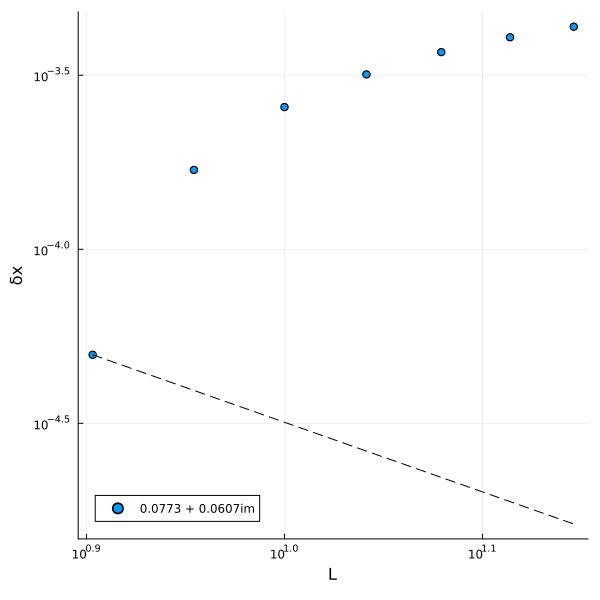

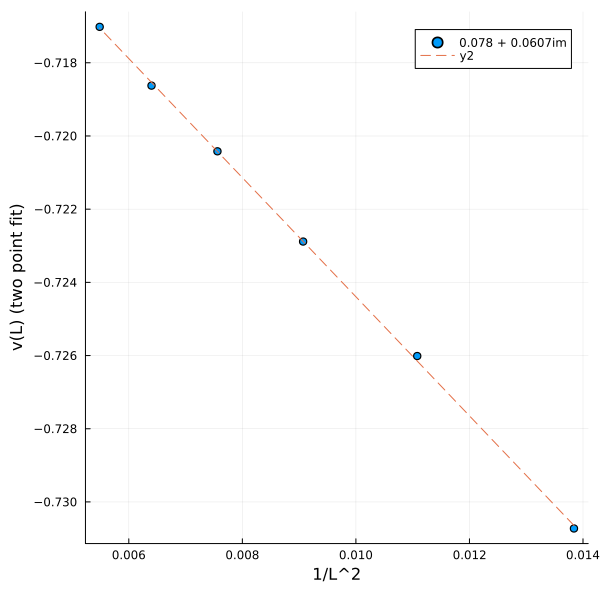

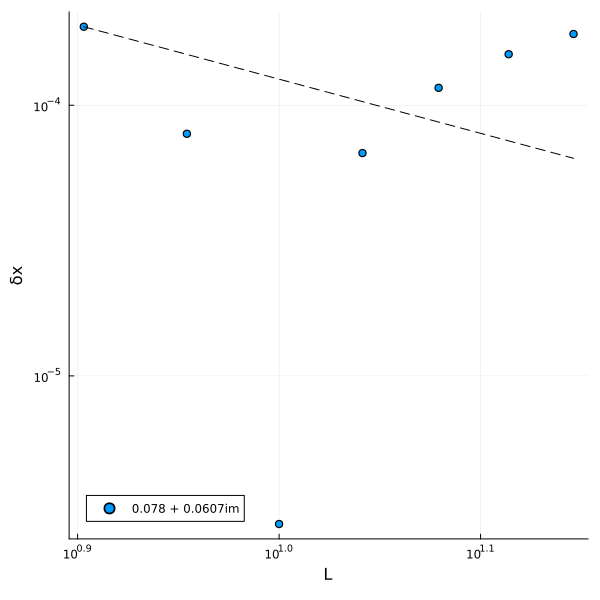

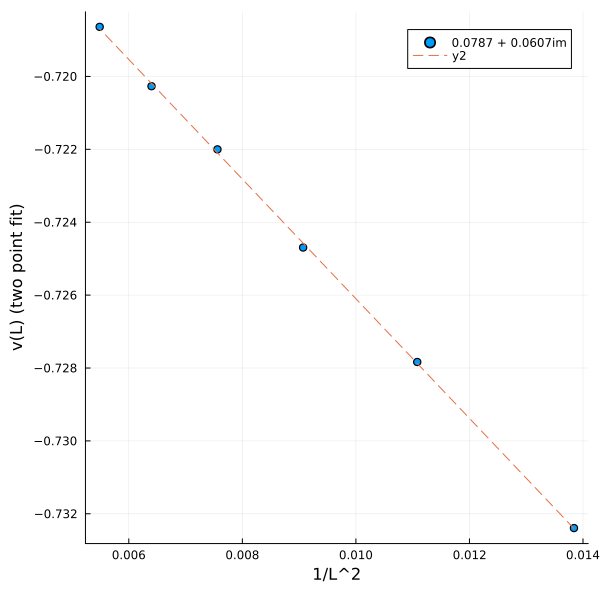

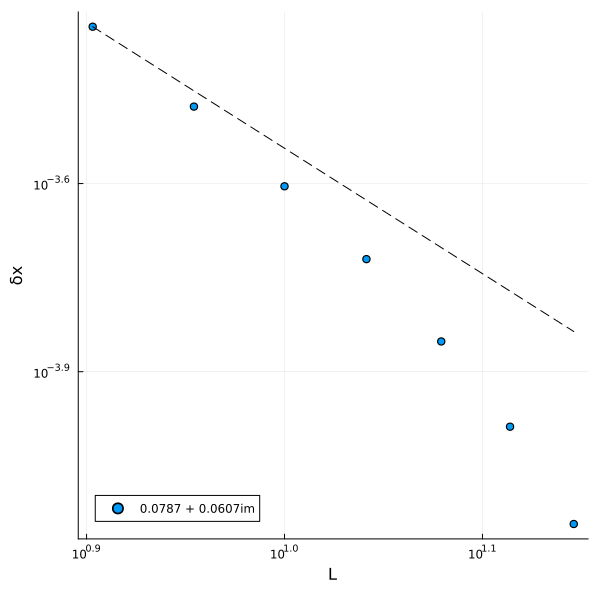

In [174]:
for i in 1:Int(length(λ_list))
    Finite_size_scaling_alt(λ_list[Int(i)],i,L_list)
end

In [ ]:

function Finite_size_scaling_alt(lambda_list,range,L_list)
    plt = plot(xscale=:log10,yscale=:log10,xlabel="L",ylabel="δx",size=(600,600),legend=:bottomleft)
    Δ_list = zeros(ComplexF64,length(L_list),1,3)
    E0_list = zeros(ComplexF64,length(L_list),1)

    for (i,L) in enumerate(L_list)
        dataσ = load("sigma_analysis/more_lambda/sigma_Energy_$(L)_80.jld2")
        E0 = dataσ["E0"][range]
        Eσ = dataσ["Eσ"][range]
        E0_list[i,1] = E0
        Δ_list[i,1,1] = Eσ .- E0
    end
    for (ind,lambda) in enumerate(lambda_list)
        ϵ0 = E0_list[:,ind]./L_list
        v_list = []
        for i=1:length(L_list)-1
            ini = i
            fit = linear_fit(1.0./L_list[ini:ini+1].^2, ϵ0[ini:ini+1])
            v = -6*fit[2]/π/cth
            push!(v_list,v) 
        end
        Leff = 0.5.+L_list[1:end-1]
        e = plot(xlabel="1/L^2",ylabel="v(L) (two point fit)",size=(600,600))
        scatter!(1.0./Leff.^2,imag(v_list),label="$lambda")
        fit = linear_fit(1.0./Leff[end-1:end].^2,v_list[end-1:end])

        plot!(1.0./Leff.^2,imag(fit[1].+fit[2]./Leff.^2),linestyle = :dash)
        display(e)
        Leff = 0.5.+L_list[1:end-1]
        v = fit[1]
       
    δx = [abs.(imag(Δ_list[:,ind,i].*L_list/(2π*v)).-imag(Δth[i+1])) for i=1:3]
    for i = 1:1
        scatter!(plt,L_list,δx[i],label="$lambda")
    end
    plot!(plt,L_list,δx[1][1]*(L_list/L_list[1]).^(-2),color=:black,label="",linestyle=:dash)
    end
    display(plt)
end

Finite_size_scaling_alt (generic function with 1 method)

In [72]:
N = 7
Op_label  = ["I","σ","ϵ","L-1ϵ"]
data = load("D500results.jld2")
Δth = [0,data["Δσ th "],data[ "Δε th"],data["ΔL1ε th"]]
cth = 1.13754733664723 - 0.0210687419403234im



test_values = zeros(ComplexF64,(2*N-1)^2)

l = length(test_values)


distx = 0.0007## distance from centre in real

disty = 0.0007# distance from centre in imaginary

cent_im = 0.0600im

cent_r = 0.0780

## snake like structure of test_values will allow for faster convergence when recycling ψ (because you don't jump the entire distx after the loop)
for i in 1:1:(2*N-1)
    if div(i,2) == 1
        for j in 1:1:(2*N-1)
            if i <N+1
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i])  .+cent_r+ 1im*LinRange(-disty,0.00,N)[j] .+cent_im
                else 
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i])  .+cent_r + 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N] .+cent_im
                end
            else
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N]) .+cent_r  + 1im*LinRange(-disty,0.00,N)[j]  .+cent_im
                else
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N])  .+cent_r+ 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N].+cent_im
                end
            end 
        end
    else
        for j in (2*N-1):-1:1
            if i <N+1
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i]) .+cent_r+ 1im*LinRange(-disty,0.00,N)[j] .+cent_im
                else 
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i])  .+cent_r + 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N] .+cent_im
                end
            else
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N]) .+cent_r + 1im*LinRange(-disty,0.00,N)[j] .+cent_im
                else
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N])   .+cent_r + 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N] .+cent_im
                end
            end 
        end
    end
end




function Finite_size_scaling_balt(lambda_list,L_list,Δ_list,E0_list)
    println(size(E0_list[1]))
    for (ind,lambda) in enumerate(lambda_list)
        println(ind)
        ϵ0 = [E0_list[i][ind][1] for i in 1:length(L_list)]./L_list
        v_list = []
        for i=1:length(L_list)-1
            ini = i
            
            fit = linear_fit(1.0./L_list[ini:ini+1].^2, ϵ0[ini:ini+1])
            v = -6*fit[2]/π/cth
            push!(v_list,v) 
        end
        Leff = 0.5.+L_list[1:end-1]
        e = plot(xlabel="1/L^2",ylabel="v(L) (two point fit)",size=(600,600))
        scatter!(1.0./Leff.^2,imag(v_list),label="$lambda")
        fit = linear_fit(1.0./Leff[end-1:end].^2,v_list[end-1:end])
        plot!(1.0./Leff.^2,imag(fit[1].+fit[2]./Leff.^2),linestyle = :dash)
        display(e)
        Leff = 0.5.+L_list[1:end-1]
        v = fit[1]

        Δ = [Δ_list[i][ind][1] for i in 1:length(L_list)]
        δx = [abs.(real(Δ.*L_list/(2π*v)).-real(Δth[i+1])) for i=1:1]
        plt = plot(xscale=:log10,yscale=:log10,xlabel="L",ylabel="δx",size=(600,600),legend=:bottomleft)
   
    for i = 1:1
        scatter!(plt,L_list,δx[i],label="$lambda")
    end
    plot!(plt,L_list,δx[1][1]*(L_list/L_list[1]).^(-2),color=:black,label="",linestyle=:dash)
    display(plt)
    end
   
end
E0 =[]
ΔEε = []
ΔEL1ε =[]
ΔEσ =[]
ΔEL1σ =[]
test_alt = []
L_list = [18,19,20,21,22,23]
for L in L_list
    g = []
    g1 = []
    g2 = []
    g3 = []
    g4 = []
    g5 = []
    for (res,lambda) in enumerate(test_values)
        lambda_txt = round(lambda,digits = 6)
       

       ## D 500
       if  (lambda_txt == 0.078583+0.06035im || lambda_txt ==  0.078233 + 0.059883im)
        
    elseif  (lambda_txt == 0.078583+0.06035im || lambda_txt == 0.078233 + 0.059883im)
         
    elseif  (lambda_txt == 077883+0.0593im  || lambda_txt ==  0.078 + 0.060233im)
            
    elseif  (lambda_txt == 0.077883 +0.060583im || lambda_txt == 0.077883 +0.0607im || lambda_txt == 0.078+0.060467im || lambda_txt == 0.078+0.060583im || lambda_txt == 0.077417+0.0607im)    
        else
        results1 = load_object("Lambda_est_precise/PBC/PBC_D_500/L$L/5EXC0_PBC_L=$L"*"_$lambda_txt"*"_D100.jld2")
        results2 = load_object("Lambda_est_precise/PBC/PBC_D_500/L$L/5EXC1_PBC_L=$L"*"_$lambda_txt"*"_D100.jld2")
        push!(g,results1[1][1])
        push!(g1,results1[2][1])
        push!(g2,results1[2][2])
        push!(g3 , results2[2][end-1])
        push!(g4,results2[2][end])
        push!(test_alt,test_values[res])
    
     
        end
    end
    push!(E0,g)
    push!(ΔEε,g1)
    push!(ΔEL1ε,g2)
    push!(ΔEσ , g3)
    push!(ΔEL1σ,g4)
end
 

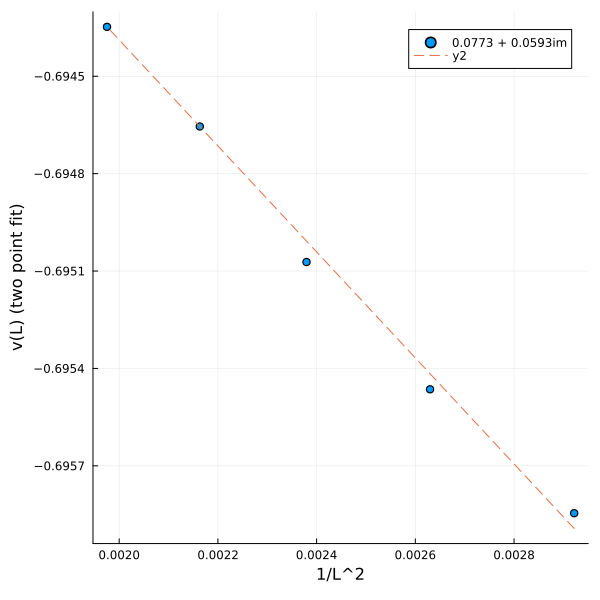

(161,)
1


UndefVarError: UndefVarError: `plt` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [71]:
Finite_size_scaling_balt(test_alt,L_list,ΔEσ,E0)

In [1]:
using PlotlyJS
using Plots
using LsqFit
function Goodness_of_fit(lambda_list,L_list)
    Δ_list = zeros(ComplexF64,length(L_list),length(lambda_list),3)
    E0_list = zeros(ComplexF64,length(L_list),length(lambda_list))
    for (i,L) in enumerate(L_list)
        dataσ = load("sigma_analysis/more_lambda/sigma_Energy_$(L)_80.jld2")
        E0 = dataσ["E0"]
        Eσ = dataσ["Eσ"]
        E0_list[i,:] = E0
        Δ_list[i,:,1] = Eσ - E0
    end
    z_values = []
    v_val =[]
    for (ind,lambda) in enumerate(lambda_list)
        ϵ0 = E0_list[:,ind]./L_list
        v_list = []
        for i=1:length(L_list)-1
            ini = i
            fit = linear_fit(1.0./L_list[ini:ini+1].^2, ϵ0[ini:ini+1])
            v = -6*fit[2]/π/cth
            push!(v_list,v)
        end
        Leff = 0.5.+L_list[1:end-1]
        fit = linear_fit(1.0./Leff[1:end].^2,v_list[1:end])
        vext = fit[1]
        LsqFitall = []
        N = 100
        range_v = [vext + (LinRange(-0.01,0.01,N)[i] +1im*LinRange(-0.01,0.01,N)[j]) for i=1:N,j=1:N]
        for v in range_v
            δx = [(Δ_list[:,ind,i].*L_list/(2π*v)).-(Δth[i+1]) for i=1:1]
            f(t,p) = p[1].*t
            p0 = [0.1,]  
            fit = LsqFit.curve_fit(f, L_list.^(-2),abs.(imag(δx[1])), p0)
        
            # e = Plots.scatter(L_list,abs.(real(δx[1])),color=:black,label="$lambda",linestyle=:dash,xscale=:log10,yscale=:log10)
            # Plots.plot!(L_list, abs.((fit.param[1]*L_list.^(-2)  )),xscale=:log10,yscale=:log10,linestyle=:dash)
            # display(e)
            Lsq = 0
            for (i,L) in enumerate(L_list)
                Lsq+= (abs(fit.param[1]*L_list[i]^(-2) -abs(imag(δx[1][i]) )))^2
            end
            push!(LsqFitall,Lsq)
        end
        push!(z_values,findmin(LsqFitall)[1])
        push!(v_val,abs((vext -range_v[findmin(LsqFitall)[2]])))
    end
    println(z_values)
    p = PlotlyJS.plot(PlotlyJS.contour(   z=z_values,
             x=real(-im*lambda_list),
                 y=real(lambda_list),fill=false,colorbar=attr(
                     title="RMSQ", # title here
                    titleside="top",
                    titlefont=attr(
                      size=14,
                      family="Arial, sans-serif"
                  )
                 )),Layout(title=attr(text = "Goodness of fit for abs((δx)) L^-2 scaling",x = 0.5),xaxis_title="Im(λ)",yaxis_title="Re(λ)")
         )
        display(p)
        p = PlotlyJS.plot(PlotlyJS.contour(   z=v_val,
        x=real(-im*lambda_list),
            y=real(lambda_list),fill=false, text=v_val,colorbar=attr(
                title="abs(v-v_extr)", # title here
               titleside="top",
               titlefont=attr(
                 size=14,
                 family="Arial, sans-serif"
             )
            )),Layout(title=attr(text = "Deviation from v_extr for best fit",x = 0.5),xaxis_title="Im(λ)",yaxis_title="Re(λ)")
    )
   display(p)
end

Goodness_of_fit (generic function with 1 method)

Any[9.531754382228309e-9, 7.751078973579375e-9, 3.788269967579891e-9, 1.6298501751694535e-9, 1.3684616001585556e-10, 1.0292329263521992e-10, 1.258177573756264e-10, 9.719682875729821e-11, 1.5940948855675023e-10, 1.079097123597573e-10, 7.987781133368498e-11, 1.074485432990012e-8, 7.10329570553002e-9, 3.7719680216856e-9, 1.1862396642464243e-9, 4.967953300874743e-10, 1.1045011986663675e-10, 8.895964264927025e-11, 7.566265993287827e-11, 9.789814332278309e-11, 8.76326448599523e-11, 6.308438462899954e-11, 1.1286256950943496e-8, 1.048061083299753e-8, 5.294298669076678e-9, 2.0725838828211018e-9, 1.394443532170399e-10, 5.963358178987611e-11, 9.711627098251508e-11, 4.6494381503326014e-11, 1.0404089434227074e-10, 5.764315633527041e-11, 7.087675558076082e-11, 1.180520330058346e-8, 1.1418366800993604e-8, 5.868878278772171e-9, 3.158688619894484e-9, 7.882253746380422e-10, 3.5647892821619606e-11, 4.0319685782570874e-11, 5.345528527643427e-11, 4.4902886708251486e-11, 2.4404131374974534e-11, 2.8297382924

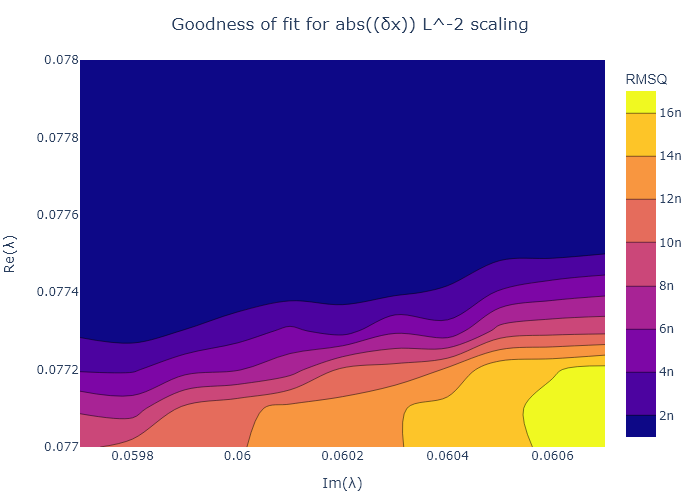

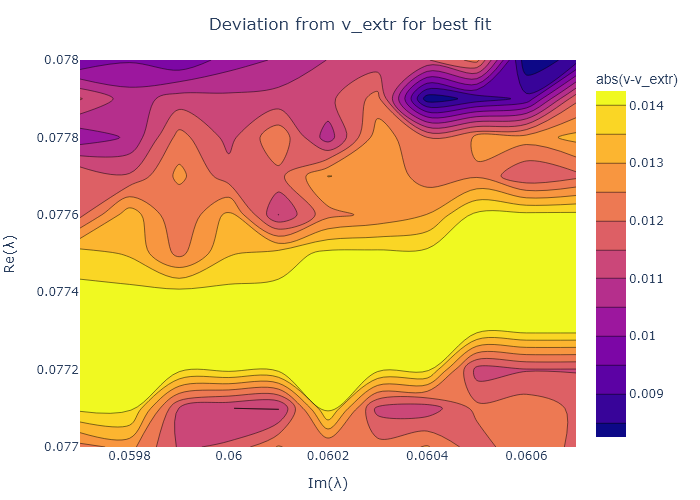

In [5]:
Goodness_of_fit(λ_list,L_list)